In [1]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [5]:
import random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

In [2]:
colors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],colors[i%len(colors)],markersize=5)

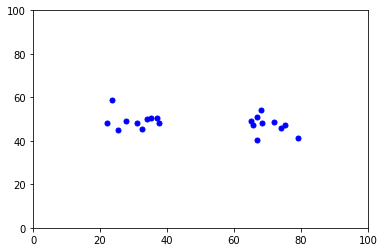

In [3]:
# A Simple Clustering Problem
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]
# shuffle(data)
plotclusters(data)

In [12]:
from scipy.spatial.distance import cdist
ds = cdist(data,data) ##Compute distance between each pair of the two collections of inputs

In [13]:
len(data)

20

In [13]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single") ##Perform hierarchical/agglomerative clustering
lm[:5]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


array([[117.        , 180.        ,   0.93949956,   2.        ],
       [ 24.        , 115.        ,   1.14132982,   2.        ],
       [ 38.        , 124.        ,   2.17235829,   2.        ],
       [ 64.        , 176.        ,   2.6002328 ,   2.        ],
       [ 23.        , 141.        ,   2.64784244,   2.        ]])

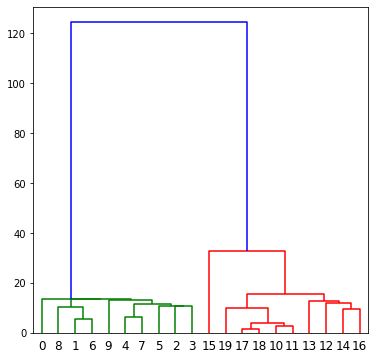

In [14]:
_=dendrogram(lm) # x axis representing points and y axis representing the height , if height more distance will be more and vice versa 

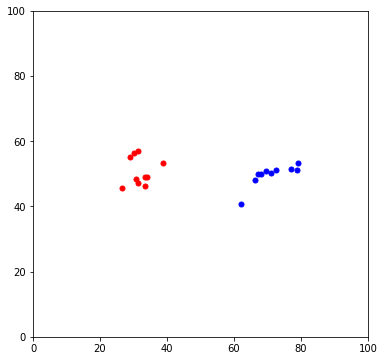

In [20]:
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

In [4]:
data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]
shuffle(data)

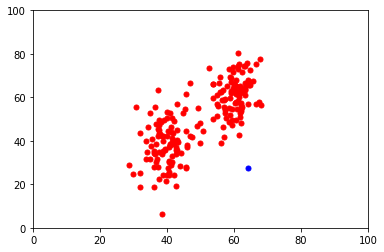

In [7]:
assignment = fclusterdata(data,2,metric='euclidean',method='single',criterion='maxclust') ## single linkage used , used when low noise data and not proper structure
plotclusters(data,assignment)

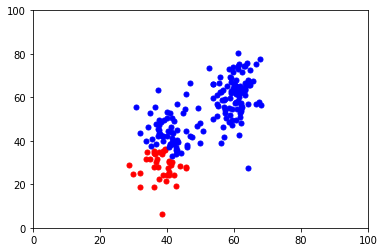

In [8]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

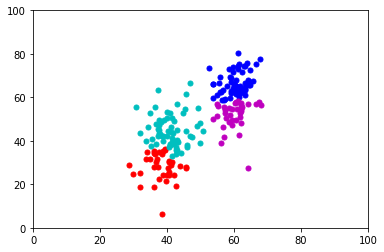

In [9]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

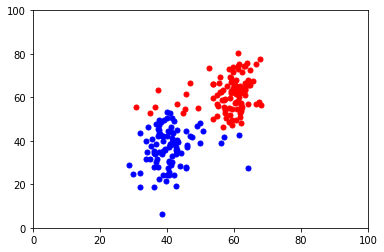

In [10]:
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)